In [1]:
import os 
import sys
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('./models/')
from useful_functions import df_to_dict, concat_dico, get_classement, sort_list


In [2]:
list_of_models= ['VAR','SEIR Mob'] #,'SEIR Mob'
indexs_points=[[20*i] for i in range(1, 15)] 

In [3]:
#Beräkna mean-loss för VAR-modellen
loss='WIS'
reach='7'
freq=[1,6,11,16,21,26,31]
mean_loss=[]
mobility_range = range(4)  # 0 to 3
number_range = range(81)  # 0 to 80
tasks = [(mob, num) for mob in mobility_range for num in number_range]

for F in freq:
    average=0
    for T in tasks:
        mob, num = T
        name = 'evaluation_with_' + loss + '_on_pandemic_' + str(mob) + '_' + str(num) +'_and_reach_=' + reach + '_freq_=' + str(F) +'.json'
        with open('./results/thinning_evaluation/'+name, 'r') as f:
            dicoresults = json.load(f)
        L = [values[0] for values in dicoresults.values()]
        average = average+sum(L)/len(L)
    mean_loss.append(average/len(mobility_range)/len(number_range))
mean_var_loss = mean_loss.copy()

In [4]:
#Beräkna mean-loss för SEIR Mob-modellen
loss='WIS'
reach='7'
freq=[1,6,11,16,21,26,31]
mean_loss=[]
mobility_range = range(4)  # 0 to 3
number_range = range(81)  # 0 to 80
tasks = [(mob, num) for mob in mobility_range for num in number_range]

for F in freq:
    average=0
    for T in tasks:
        mob, num = T
        ref_name = 'evaluation_with_' + loss + '_of_1D_models' + '_on_pandemic_' + str(mob) + '_' + str(num) + '_and_reach_=' + reach +'.json'
        with open('./results/global_evaluation/'+ref_name, 'r') as f:
            dicoresults = json.load(f)
        L_ref = np.array([values[0] for values in dicoresults.values()])
        name = 'evaluation_with_' + loss+'_on_pandemic_' + str(mob) + '_' + str(num) +'_and_reach_=' + reach + '_freq_=' + str(F) +'.json'
        with open('./results/thinning_evaluation/'+name, 'r') as f:
            dicoresults = json.load(f)
        L = np.array([values[1] for values in dicoresults.values()])
        L[np.isinf(L)] = L_ref[np.isinf(L)]
        if np.isinf(L).any():
            print(mob,num,F)
        average = average+sum(L)/len(L)
    mean_loss.append(average/len(mobility_range)/len(number_range))
mean_seir_loss = mean_loss.copy()

In [5]:
#Beräkna mean-WIS för MA-modellen
loss='WIS'
reach='7'
mobility_range = range(4)  # 0 to 3
number_range = range(81)  # 0 to 80
tasks = [(mob, num) for mob in mobility_range for num in number_range]
average=0
for T in tasks:
    mob, num = T
    name = 'evaluation_with_' + loss + '_of_1D_models' + '_on_pandemic_' + str(mob) + '_' + str(num) + '_and_reach_=' + reach +'.json'
    with open('./results/global_evaluation/'+name, 'r') as f:
        dicoresults = json.load(f)
    L = [values[0] for values in dicoresults.values()]
    average = average+sum(L)/len(L)
mean_loss_ref=average/len(mobility_range)/len(number_range)

[481.10261248312975, 398.55556858762435, 361.8718171627317, 376.5900242398601, 359.9022819136867, 359.7107087355867, 384.2933657004168]
1475.5051953256354


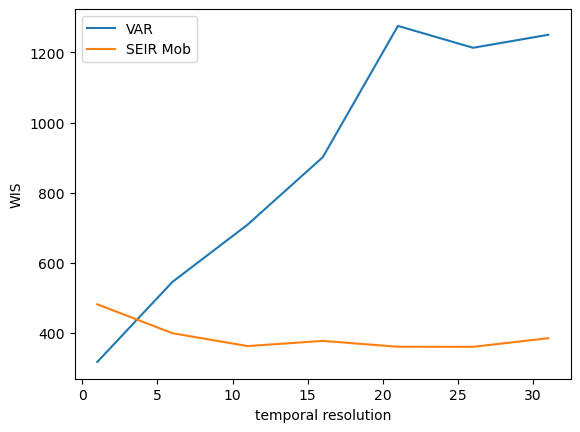

In [6]:
print(mean_loss)
print(mean_loss_ref)
plt.plot(freq,mean_var_loss,label='VAR')
plt.plot(freq,mean_seir_loss,label='SEIR Mob')
plt.xlabel('temporal resolution')
plt.ylabel('WIS')
plt.legend()
plt.savefig('fig5.pdf')